# Combinatorics with Uproot and Awkward Arrays

In this presentation, I'll show a **basic** and an **advanced** analysis using Uproot-Awkward Array-Vector-Hist.

I'll leave a lot of time open for questions, since that is the advantage of a live session over a pre-recorded tutorial.

If you'd like to see similar tutorials, all focusing on different things, you can find them online:

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
|:--|:--|:--|:--|:--|
| 2020 | EIC collaboration tutorial | | [notebooks](https://github.com/jpivarski-talks/2020-04-08-eic-jlab#readme) | [video](https://www.youtube.com/watch?v=FoxNS6nlbD0) |
| 2020 | CMS HATS tutorial | | [notebooks](https://github.com/jpivarski/2020-06-08-uproot-awkward-columnar-hats#readme) | |
| 2020 | SciPy talk | non-HEP | [notebooks](https://github.com/jpivarski-talks/2020-07-06-scipy2020/blob/master/bikeroutes-execution.ipynb) | [video](https://youtu.be/WlnUF3LRBj4) |
| 2020 | PyHEP tutorial | | [notebooks](https://github.com/jpivarski/2020-07-13-pyhep2020-tutorial#readme) | [video](https://youtu.be/ea-zYLQBS4U) |
| 2021 | CMS HATS tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-06-14-uproot-awkward-columnar-hats#readme) | |
| 2021 | PyHEP tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-07-06-pyhep-uproot-awkward-tutorial#readme) | [video](https://youtu.be/s47Nz0h0vcg) |
| 2021 | STAR collaboration tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-09-13-star-uproot-awkward-tutorial#readme) | |
| 2022 | PyHEP topical meeting | | [notebooks](https://indico.cern.ch/event/1140031/) | |
| 2022 | SciPy tutorial | non-HEP | [notebooks](https://github.com/jpivarski-talks/2022-07-11-scipy-loopy-tutorial#readme) | [video](https://youtu.be/Dovyd72eD70) |
| 2022 | CoDaS-HEP tutorial | | [notebooks](https://github.com/jpivarski-talks/2022-08-03-codas-hep-columnar-tutorial#readme) | |

This presentation will also use Uproot version 5 and Awkward version 2, which will be fully released in December. For now,

```bash
pip install --pre uproot awkward
```

and

In [1]:
import uproot

In [2]:
import awkward._v2 as ak

<br><br><br><br><br>

## Overview

Just as in the broader Python world, functionality in Scikit-HEP is provided by small, specialized, interoperating libraries that build on each other.

<table width="1000px"><tr style="background: white">
    <td align="center" width="50%" style="font-size: 24px; font-weight: bold">Scientific Python ecosystem</td>
    <td align="center" width="50%" style="font-size: 24px; font-weight: bold">Scikit-HEP ecosystem</td>
</tr><tr style="background: white">
    <td align="center" width="50%"><img src="img/shells-border.png" width="95%"></td>
    <td align="center" width="50%"><img src="img/shells-hep.svg" width="95%"></td>
</tr></table>

<br><br><br><br><br>

## Libraries used in this talk

<br><br>

<img src="img/uproot-logo.png" width="200px">

<p style="font-size: 14pt">Reads ROOT data as <span style="background: yellow">arrays</span>.</p>

<br><br>

<img src="img/awkward-logo.png" width="200px">

<p style="font-size: 14pt">Manipulates <span style="background: yellow">arrays</span> of arbitrary data structures.</p>

<br><br>

<img src="img/vector-logo.png" width="200px">

<p style="font-size: 14pt">Transforms <span style="background: yellow">arrays</span> of 2D, 3D, and Lorentz vectors.</p>

<br><br>

<img src="img/hist-logo.png" width="200px">

<p style="font-size: 14pt">Fills histograms from <span style="background: yellow">arrays</span> of data.</p>

<br><br>

<b>Using them effectively will require thinking about whole arrays at a time.</b>

<br><br><br>

## Array-at-a-time thinking and interactivity

There's a long history of _array-oriented_ languages, which take arrays as the fundamental data type.

<img src="img/apl-timeline.svg" width="800">

<br><br><br>

Interestingly enough, they all (except Fortran 90 and Dex) are _interactive_, command-line or notebook-driven languages.

<br>

It's because they focus on problems in which we want to know what happens to whole distributions, not individual values.

<br>

For example,

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<br><br>

Suppose we start with a Gaussian-distributed dataset.

In [4]:
dataset = np.random.normal(0, 1, 1000000)  # one MILLION data points

<br><br>

"How are they distributed?"

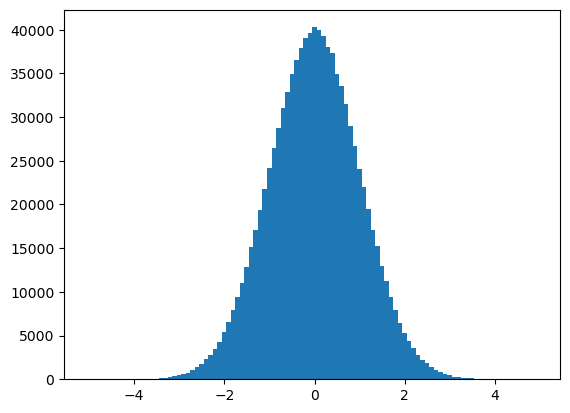

In [5]:
plt.hist(dataset, bins=100);

<br><br>

"How is the square of each point distributed?"

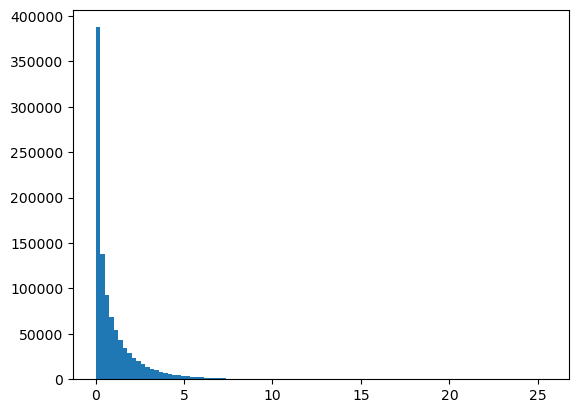

In [6]:
plt.hist(dataset**2, bins=100);

<br><br>

"What about this weirdo function?"

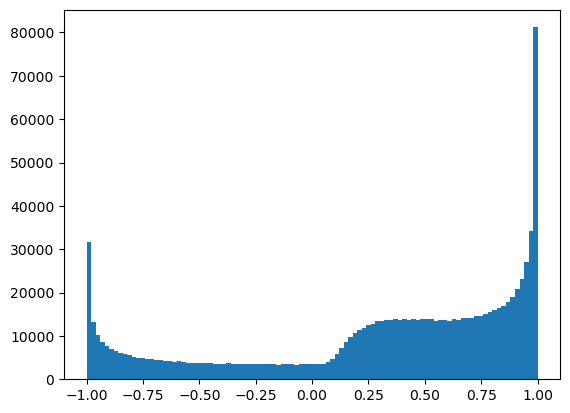

In [7]:
plt.hist(np.sin(1/dataset**2), bins=100);

<br><br>

The shape of the last distribution would have been hard to guess, and as long as we're in "compute operation, plot, compute operation, plot" mode, setting up `for` loops would be a hindrance.

<br><br>

Array-oriented computations and interactivity go together. If you don't like Jupyter, consider IPython, the basic Python prompt, or IDE features that let you interact with an ongoing session. Don't just run a script until you've already figured out the details of your project.

<br><br><br><br><br>

## Basic Uproot

Uproot is a reimplementation of ROOT I/O in Python, with no dependence on C++ ROOT.

<img src="img/abstraction-layers.svg" width="800">

<br><br><br>

### Example of an interactive session

<br><br>

"Where's my file?"

In [8]:
!ls -l

total 552
drwxr-xr-x   3 jpivarski  staff      96 Sep 11 12:48 data
drwxr-xr-x  10 jpivarski  staff     320 Sep 11 12:49 img
-rw-r--r--   1 jpivarski  staff  279164 Sep 11 14:43 pyhep2022-uproot-and-awkward-array.ipynb


In [9]:
!ls -l data

total 82816
-rw-r--r--  1 jpivarski  staff  42400229 Sep 11 12:48 SMHiggsToZZTo4L.root


<br><br>

"Open it in Uproot."

In [10]:
file = uproot.open("data/SMHiggsToZZTo4L.root")
file

<ReadOnlyDirectory '/' at 0x00011e7174c0>

<br><br>

"What's in the file?"

In [11]:
file.keys()

['Events;1']

<br><br>

"What kind of object is 'Events'?"

In [12]:
file.classnames()

{'Events;1': 'TTree'}

<br><br>

"Get the TTree metadata (not the whole arrays; not yet)."

In [13]:
tree = file["Events"]
tree

<TTree 'Events' (32 branches) at 0x00011e875b40>

In [14]:
tree.num_entries

299973

<br><br>

"What kinds of data are in the TTree?"

In [15]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
PV_npvs              | int32_t                  | AsDtype('>i4')
PV_x                 | float                    | AsDtype('>f4')
PV_y                 | float                    | AsDtype('>f4')
PV_z                 | float                    | AsDtype('>f4')
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_mass            | float[]                  | AsJagged(AsDtype('>f4'))
Muon_charge       

<br><br>

"Can I get that information programmatically?"

(Yes.)

In [16]:
{key: branch.typename for key, branch in tree.items()}

{'run': 'int32_t',
 'luminosityBlock': 'uint32_t',
 'event': 'uint64_t',
 'PV_npvs': 'int32_t',
 'PV_x': 'float',
 'PV_y': 'float',
 'PV_z': 'float',
 'nMuon': 'uint32_t',
 'Muon_pt': 'float[]',
 'Muon_eta': 'float[]',
 'Muon_phi': 'float[]',
 'Muon_mass': 'float[]',
 'Muon_charge': 'int32_t[]',
 'Muon_pfRelIso03_all': 'float[]',
 'Muon_pfRelIso04_all': 'float[]',
 'Muon_dxy': 'float[]',
 'Muon_dxyErr': 'float[]',
 'Muon_dz': 'float[]',
 'Muon_dzErr': 'float[]',
 'nElectron': 'uint32_t',
 'Electron_pt': 'float[]',
 'Electron_eta': 'float[]',
 'Electron_phi': 'float[]',
 'Electron_mass': 'float[]',
 'Electron_charge': 'int32_t[]',
 'Electron_pfRelIso03_all': 'float[]',
 'Electron_dxy': 'float[]',
 'Electron_dxyErr': 'float[]',
 'Electron_dz': 'float[]',
 'Electron_dzErr': 'float[]',
 'MET_pt': 'float',
 'MET_phi': 'float'}

<br><br>

"Read the muon $p_T$, $\eta$, $\phi$, and mass into arrays (and nothing else!)."

This is the first _expensive_ operation, where you might have to wait.

In [17]:
muon_kinematics = tree.arrays(["Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass"])
muon_kinematics

<Array [{Muon_pt: [63, ...], ...}, ..., {...}] type='299973 * {Muon_pt: var...'>

Note that there's a way to limit how much you read/how long you have to wait:

In [18]:
tree.arrays(["Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass"], entry_stop=100)

<Array [{Muon_pt: [63, ...], ...}, ..., {...}] type='100 * {Muon_pt: var * ...'>

<br><br>

"Show me that (already read) data in more detail, including data types."

In [19]:
muon_kinematics.show(type=True)

type: 299973 * {
    Muon_pt: var * float32,
    Muon_eta: var * float32,
    Muon_phi: var * float32,
    Muon_mass: var * float32
}
[{Muon_pt: [63, 38.1, 4.05], Muon_eta: [-0.719, ...], Muon_phi: [...], ...},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [54.3, 23.5, ..., 8.39, 3.49], Muon_eta: [...], Muon_phi: ..., ...},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [38.5, 47], Muon_eta: [0.315, -0.119], Muon_phi: [...], ...},
 {Muon_pt: [4.45], Muon_eta: [-0.986], Muon_phi: [1.12], Muon_mass: ..., ...},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 ...,
 {Muon_pt: [37.2, 50.1], Muon_eta: [1.1, 0.412], Muon_phi: [...], ...},
 {Muon_pt: [43.2, 24], Muon_eta: [2.15, 0.421], Muon_phi: [...], ...},
 {Muon_pt: [24.2, 79.5], Muon_eta: [0.327, 0.79], Muon

<br><br>

"Which columns in the TTree have anything to do with muons or electrons?"

In [20]:
tree.keys(filter_name=["Muon_*", "Electron_*"])

['Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_mass',
 'Muon_charge',
 'Muon_pfRelIso03_all',
 'Muon_pfRelIso04_all',
 'Muon_dxy',
 'Muon_dxyErr',
 'Muon_dz',
 'Muon_dzErr',
 'Electron_pt',
 'Electron_eta',
 'Electron_phi',
 'Electron_mass',
 'Electron_charge',
 'Electron_pfRelIso03_all',
 'Electron_dxy',
 'Electron_dxyErr',
 'Electron_dz',
 'Electron_dzErr']

<br><br>

"Read all of those columns into arrays, using the same `filter_name`."

In [21]:
muons_and_electrons = tree.arrays(filter_name=["Muon_*", "Electron_*"])
muons_and_electrons

<Array [{Muon_pt: [63, ...], ...}, ..., {...}] type='299973 * {Muon_pt: var...'>

<br><br>

"More detail, please."

In [22]:
muons_and_electrons.show(type=True)

type: 299973 * {
    Muon_pt: var * float32,
    Muon_eta: var * float32,
    Muon_phi: var * float32,
    Muon_mass: var * float32,
    Muon_charge: var * int32,
    Muon_pfRelIso03_all: var * float32,
    Muon_pfRelIso04_all: var * float32,
    Muon_dxy: var * float32,
    Muon_dxyErr: var * float32,
    Muon_dz: var * float32,
    Muon_dzErr: var * float32,
    Electron_pt: var * float32,
    Electron_eta: var * float32,
    Electron_phi: var * float32,
    Electron_mass: var * float32,
    Electron_charge: var * int32,
    Electron_pfRelIso03_all: var * float32,
    Electron_dxy: var * float32,
    Electron_dxyErr: var * float32,
    Electron_dz: var * float32,
    Electron_dzErr: var * float32
}
[{Muon_pt: [63, 38.1, 4.05], Muon_eta: [-0.719, ...], Muon_phi: [...], ...},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: [], ...},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: [], ...},
 {Muon_pt: [54.3, 23.5, ..., 8.39, 3.49], Muon_eta: [...], Muon_phi: ..., ...},
 {Muo

<br><br><br><br><br>

### Examining distributions

NumPy and Matplotlib both have `histogram` (or `hist`) functions, but these are _display_ options. In particle physics, we almost always want a histogram object that we can fill in parallel, redraw without refilling, etc. Even weighted histograms with error bars require more than what NumPy and Matplotlib give us.

So although

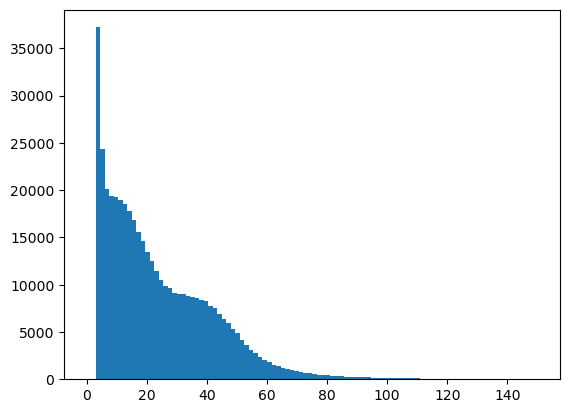

In [23]:
plt.hist(ak.flatten(muon_kinematics.Muon_pt), bins=100, range=(0, 150));

works, you probably want

In [24]:
import hist

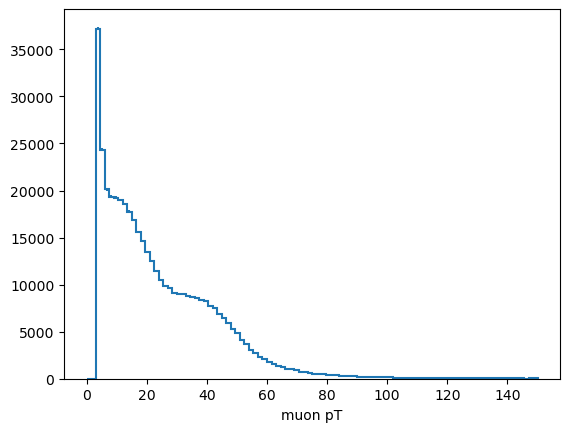

In [25]:
h = hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()

h.fill(ak.flatten(muon_kinematics.Muon_pt))

h.plot();

<br><br><br>

Or even

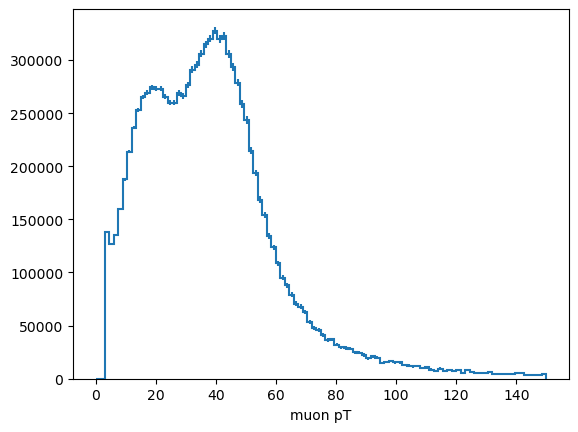

In [26]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Weight()
        .fill(
            ak.flatten(muon_kinematics.Muon_pt),
            weight=ak.flatten(muon_kinematics.Muon_pt),
        )
        .plot()
);

<br><br><br>

### What is `ak.flatten`?

In both of the above examples, we didn't just plot

In [27]:
muon_kinematics.Muon_pt

<Array [[63, 38.1, 4.05], [], [], ..., [], []] type='299973 * var * float32'>

but

In [28]:
ak.flatten(muon_kinematics.Muon_pt)

<Array [63, 38.1, 4.05, 54.3, ..., 4.36, 5.63, 4.75] type='441394 * float32'>

<br><br>

The first array is an array of _lists_. To fill a histogram, you need an array of _numbers_. `ak.flatten` removes the list structure.

<br><br>

There are other ways of removing the list structure, depending on what you're trying to do:

In [29]:
ak.sum(muon_kinematics.Muon_pt, axis=1)

<Array [105, 0, 0, 152, 0, ..., 35.3, 75.6, 19.1, 0, 0] type='299973 * float32'>

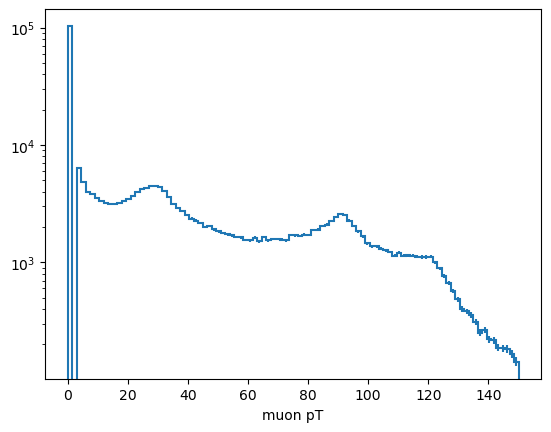

In [30]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.sum(muon_kinematics.Muon_pt, axis=1))
        .plot()
);
plt.yscale("log");

<br><br>

In [31]:
ak.max(muon_kinematics.Muon_pt, axis=1)

<Array [63, None, None, 54.3, ..., 5.63, None, None] type='299973 * ?float32'>

In [32]:
ak.fill_none(ak.max(muon_kinematics.Muon_pt, axis=1), 0)

<Array [63, 0, 0, 54.3, 0, ..., 25.5, 43.1, 5.63, 0, 0] type='299973 * float64'>

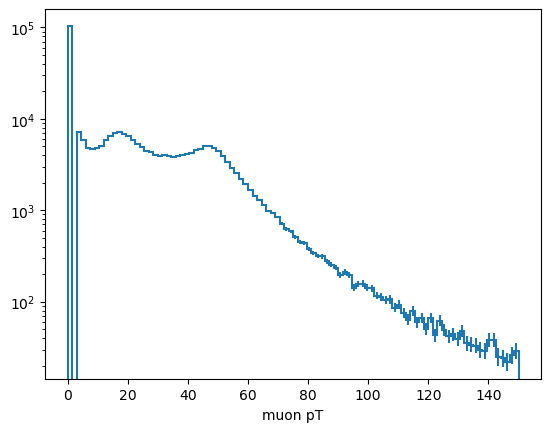

In [33]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.fill_none(ak.max(muon_kinematics.Muon_pt, axis=1), 0))
        .plot()
);
plt.yscale("log");

<br><br><br><br><br>

### Vector calculations

We can compute coordinate transformations and invariant masses manually, using NumPy's array-at-a-time functions.

In [34]:
px = muon_kinematics.Muon_pt * np.cos(muon_kinematics.Muon_phi) * np.cosh(muon_kinematics.Muon_eta)
py = muon_kinematics.Muon_pt * np.sin(muon_kinematics.Muon_phi) * np.cosh(muon_kinematics.Muon_eta)
pz = muon_kinematics.Muon_pt * np.sinh(muon_kinematics.Muon_eta)

In [35]:
px

<Array [[-78.8, 27.6, 2.16], [], [], ..., [], []] type='299973 * var * float32'>

In [36]:
py

<Array [[13.8, -46.2, 3.67], [], [], ..., [], []] type='299973 * var * float32'>

In [37]:
pz

<Array [[-49.3, -38, -1.32], [], [], ..., [], []] type='299973 * var * float32'>

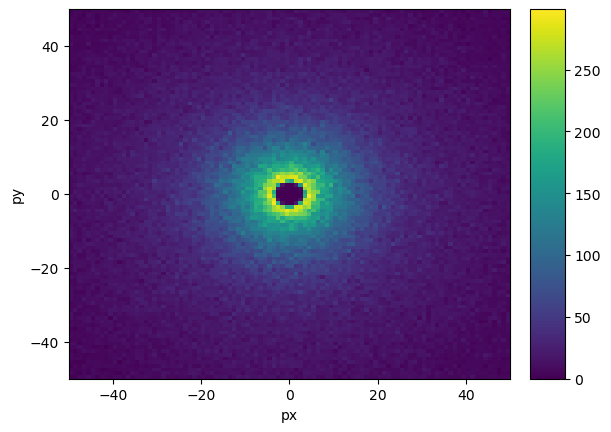

In [38]:
(
    hist.Hist.new.Regular(100, -50, 50, name="px").Regular(100, -50, 50, name="py").Double()
        .fill(ak.flatten(px), ak.flatten(py))
        .plot()
);

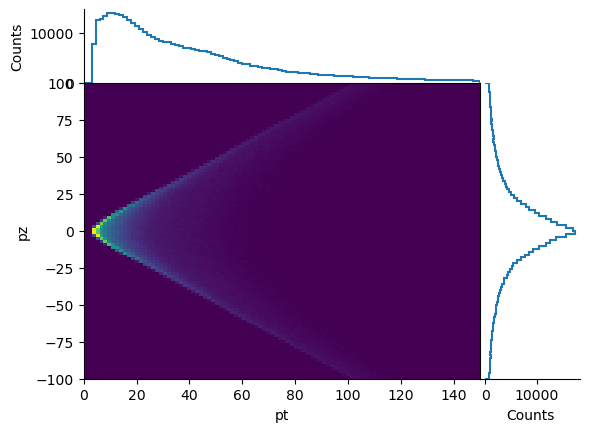

In [39]:
(
    hist.Hist.new.Regular(100, 0, 150, name="pt").Regular(100, -100, 100, name="pz").Double()
        .fill(ak.flatten(np.sqrt(px**2 + py**2)), ak.flatten(pz))
        .plot2d_full()
);

<br><br><br>

But you'd probably rather use the Vector library.

(Normally, you'd just `import vector`, but the following is necessary to get Vector to recognize Awkward version 2, which will be released in December.)

In [40]:
import awkward
awkward.Array = awkward.highlevel.Array = awkward._v2.highlevel.Array
awkward.Record = awkward.highlevel.Record = awkward._v2.highlevel.Record

import vector
import vector.backends.awkward
ak.behavior.update(vector.backends.awkward.behavior)

In [41]:
muons = ak.zip({
    "pt": muon_kinematics.Muon_pt,
    "eta": muon_kinematics.Muon_eta,
    "phi": muon_kinematics.Muon_phi,
    "mass": muon_kinematics.Muon_mass,
}, with_name="Momentum4D")

In [45]:
muons.show(type=True)

type: 299973 * var * Momentum4D[
    pt: float32,
    eta: float32,
    phi: float32,
    mass: float32
]
[[<MomentumRecord4D {pt: 63, eta: -0.719, phi: 2.97, ...} type='Momentum4D[pt...'>, <MomentumRecord4D {pt: 38.1, eta: -0.879, phi: -1.03, ...} type='Momentum4D...'>, <MomentumRecord4D {pt: 4.05, eta: -0.321, phi: 1.04, ...} type='Momentum4D[...'>],
 [],
 [],
 [<MomentumRecord4D {pt: 54.3, eta: -1.06, phi: -0.362, ...} type='Momentum4D...'>, ..., <MomentumRecord4D {pt: 3.49, eta: 0.769, phi: 2.03, ...} type='Momentum4D[p...'>],
 [],
 [<MomentumRecord4D {pt: 38.5, eta: 0.315, phi: 2.05, ...} type='Momentum4D[p...'>, <MomentumRecord4D {pt: 47, eta: -0.119, phi: -1.15, ...} type='Momentum4D[p...'>],
 [{pt: 4.45, eta: -0.986, phi: 1.12, mass: 0.106}],
 [],
 [],
 [],
 ...,
 [<MomentumRecord4D {pt: 37.2, eta: 1.1, phi: -0.875, ...} type='Momentum4D[p...'>, <MomentumRecord4D {pt: 50.1, eta: 0.412, phi: 2.65, ...} type='Momentum4D[p...'>],
 [<MomentumRecord4D {pt: 43.2, eta: 2.15, phi: -1.3

<br><br><br>

Note that each `Momentum4D` vector has a single `pt`, `eta`, `phi`, `mass` value, not a list, as `muon_kinematics` does:

In [46]:
muon_kinematics.show(type=True)

type: 299973 * {
    Muon_pt: var * float32,
    Muon_eta: var * float32,
    Muon_phi: var * float32,
    Muon_mass: var * float32
}
[{Muon_pt: [63, 38.1, 4.05], Muon_eta: [-0.719, ...], Muon_phi: [...], ...},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [54.3, 23.5, ..., 8.39, 3.49], Muon_eta: [...], Muon_phi: ..., ...},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [38.5, 47], Muon_eta: [0.315, -0.119], Muon_phi: [...], ...},
 {Muon_pt: [4.45], Muon_eta: [-0.986], Muon_phi: [1.12], Muon_mass: ..., ...},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 {Muon_pt: [], Muon_eta: [], Muon_phi: [], Muon_mass: []},
 ...,
 {Muon_pt: [37.2, 50.1], Muon_eta: [1.1, 0.412], Muon_phi: [...], ...},
 {Muon_pt: [43.2, 24], Muon_eta: [2.15, 0.421], Muon_phi: [...], ...},
 {Muon_pt: [24.2, 79.5], Muon_eta: [0.327, 0.79], Muon

<br><br><br>

Now coordinate transformations are array-at-a-time methods and properties:

In [47]:
muons.px

AssertionError: <MomentumArray4D [[<MomentumRecord4D {pt: 63, eta: -0.719, phi: 2.97, ...} type='Momentum4D[pt...'>, ...], ...] type='...'>